## Logistic Regression
Linear Regression can output any values, but there are scenarios where the expected output has to be between 0 and 1. For instance, in classification tasks, you would want to calculate the probability that the new sample belongs to a particular class. And probabilities have to be between 0 and 1, which Linear Regression doesn't respect. We can use the same gradient descent algorithm and modify the loss function a little bit to reflect the change in output to make it between 0 and 1.

One more reason why Linear Regression is not suitable is because it assumes that the data (residuals) is normally distributed, and this assumption is not satisfied when the data is binary (in classification problem).

Another reason for the failure of Linear Regression is, probability is often times not linear. Imagine a "U" shape where the probabilities are very high and very low at the extreme values of x.

One such function is the sigmoid activation. We'll see how the function is derived, and what are the properties of sigmoid. In a nutshell -- Linear Regression fits a straight line to the data. Logistic Regression fits a sigmoid to the data.

### Sigmoid Activation
Our requirement is,

$$0 \le h_\theta(x) \le 1$$

For starters, let's design a function that always outputs a positive value (remember probabilities are always non-negative). Consider the euler number $e$, $e$ raised to anything will always be positive. This function is called __Natural Exponentiation Function__.

### Intuitive explanation of Sigmoid
#### Why use $e^x$ and not something else?
Exponential functions have nice mathematical properties, few of them are as follows:

1. Exponential functions (Sigmoid) introduce non-linearity
2. Exponential functions are differentiable
3. Exponential functions are convex, therefore it has only global minimum, thus easy to optimize.

Now that we have only positive values, the next is to make it less than 1 (remember, probabilities are always less than 1). Now, for any positive number, if we divide that number by itself + 1, the output will always be less than 1. So our function becomes:

$$\frac{e^x}{e^x + 1}$$

Now we have the desired properties, the function is never lesser than 0 nor greater than 1. For simplification purpose, we divide both the numerator and the denominator by $e^x$, our function becomes,

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

### Mathematical derivation of Sigmoid / Logistic Regression
Logistic Regression relies on the principle of Maximum Likelihood Estimation (MLE). Intuitive definition of what MLE does is: Given certain data, there are multiple functions that can model it. Each of the functions tries to replicate what the underlying process does. MLE tries to find which of the function represents the underlying process accurately. Following are some definitions before proceeding to the derivation.

#### Odds
Odds are nothing but the ratio of the probability that an event occurs vs the probability that an event does not occur. It is given by (assuming Bernoulli trials),

$$Odds = \frac{P(occuring)}{P(not \ occuring)} = \frac{p}{1 - p}$$

#### Logit
Logit is simply the natural logarithm of odds,

$$logit(p) = ln \frac{p}{1 - p}$$

#### Sigmoid
The inverse of the Logit function is the Sigmoid function.


#### Comparison with Linear Regression

In Linear Regression, the net input of the linear combination is the same as the hypothesis:

$$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ....$$

In Logistic Regression, our net input is not our hypothesis:

$$z = \theta_0 + \theta_1x_1 + \theta_2x_2 + ....$$

Instead, this net input is equal to the logit of our hypothesis,

$$\ln\left(\frac{h_\theta(x)}{1-h_\theta(x)}\right) = z$$

Taking the exponential on both sides,

$$\frac{h_\theta(x)}{1-h_\theta(x)} = e^{z}$$

After some algebra, we have,

$$h_\theta(x) = \frac{1}{1+e^{-z}}$$

Which is the definition of sigmoid.

### Gradient of sigmoid function

$
\begin{align}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( \dfrac{1 + e^{-x}}{1 + e^{-x}} - \dfrac{1}{1 + e^{-x}} \right) \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align}
$

### Visualizing sigmoid

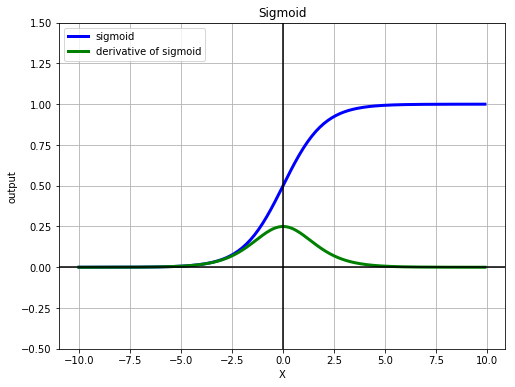

In [10]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.arange(-10, 10, 0.1)
plt.figure(figsize = (8, 6))
plt.plot(X, sigmoid(X), label = 'sigmoid', c = 'blue', linewidth = 3)
plt.plot(X, grad_sigmoid(X), label = 'derivative of sigmoid', c = 'green', linewidth = 3)
plt.xlabel('X')
plt.ylabel('output')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.title('Sigmoid')
plt.ylim([-0.5, 1.5])
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.show()

## Cost function and Optimization Objective for Logistic Regression

The objective function for logistic regression will be a little different. Instead of minimizing the sum of squared residuals like in Linear Regression, we'll now differentiate the negative log of our sigmoid. The main reason for this is because the least squares cost function for the sigmoid is non-convex, it has some local optimums, which means that gradient descent is not guaranteed to find the global optimum.

Why do we use negative log instead of some other functions?
1. It is differentiable.
2. It is convex, it only has a global optimum.
3. It intersects the x-axis at x = 1.
4. It tends to infinity as x tends to 0.

An error can be anywhere between 0 to infinity. A perfect prediction would result in a zero error. The further away our prediction is from the actual value, the larger the error. Thus, negative log is the perfect cost function for our sigmoid.

Our loss function will be:
$$
\begin{equation}
    Cost(h_\theta(x), y)=
    \begin{cases}
        -log(h_\theta(x)), & \text{if}\ y=0 \\
        -log(1 - h_\theta(x)), & \text{if}\ y=1
    \end{cases}
\end{equation}
$$

Where, $h_\theta(x)$ is our sigmoid function
$$h_\theta(x) = \frac{1}{1+e^{-z}}$$

Instead of writing two separate equations, we'll write it in one single form:

$$Cost(h_\theta(x), y) = -ylog(h_\theta(x)) - (1 - y)log(1 - h_\theta(x))$$

When y = 0, the left part of the equation automatically becomes 0. When y = 1, the right part of the equation automatically becomes 0. Thus, we have represented the same concept as above in a single equation.

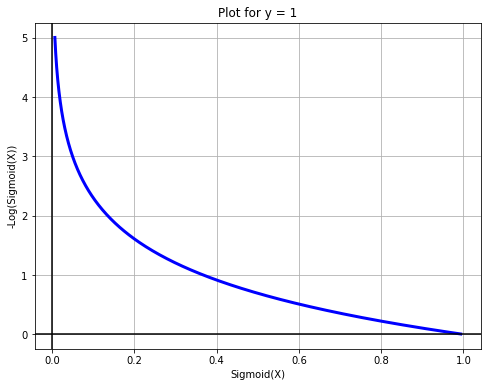

In [22]:
X = np.arange(-5, 5, 0.01)
plt.figure(figsize = (8, 6))
plt.plot(sigmoid(X), -np.log(sigmoid(X)), c = 'blue', linewidth = 3)
plt.title('Plot for y = 1')
plt.xlabel('Sigmoid(X)')
plt.ylabel('-Log(Sigmoid(X))')
plt.grid(True)
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.show()

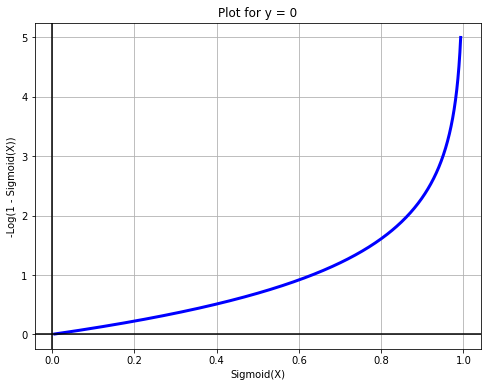

In [23]:
X = np.arange(-5, 5, 0.01)
plt.figure(figsize = (8, 6))
plt.plot(sigmoid(X), -np.log(1 - sigmoid(X)), c = 'blue', linewidth = 3)
plt.title('Plot for y = 0')
plt.xlabel('Sigmoid(X)')
plt.ylabel('-Log(1 - Sigmoid(X))')
plt.grid(True)
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.show()

## Limitations of Logistic Regression

### Linear Classifier
Despite using the sigmoid non-linearity, the logistic regression classifier is still a ***linear combination*** of the inputs and hence is a **linear classifier**. Thus, it cannot classify for data that is not linearly separable.

## Interpretation of Weights

In Linear Regression, we have a simple interpretation. In the equation

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ....$$

The interpretation of the weight is: While all other variables are held constant, for a one unit increase in $x_i$ the output will increase by $\theta_i$. This changes a little bit in Logistic Regression.

$$\ln\left(\frac{h_\theta(x)}{1 - h_\theta(x)}\right) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ....$$

In a way, we can say that Logistic Regression is a linear regression on log-odds. So the interpretation of the weight becomes: While all other variables are held constant, for a one unit increase in $x_i$ the log-odds will increase by $\theta_i$.